<a href="https://colab.research.google.com/github/Belal-AI/Data-Science-And-Ml-projects/blob/main/regularizations_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("airlinedelaycauses_DelayedFlights.csv")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001831 entries, 0 to 1001830
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1001831 non-null  int64  
 1   Year               1001831 non-null  int64  
 2   Month              1001831 non-null  int64  
 3   DayofMonth         1001831 non-null  int64  
 4   DayOfWeek          1001831 non-null  int64  
 5   DepTime            1001831 non-null  float64
 6   CRSDepTime         1001831 non-null  int64  
 7   ArrTime            998219 non-null   float64
 8   CRSArrTime         1001831 non-null  int64  
 9   UniqueCarrier      1001831 non-null  object 
 10  FlightNum          1001831 non-null  int64  
 11  TailNum            1001827 non-null  object 
 12  ActualElapsedTime  998219 non-null   float64
 13  CRSElapsedTime     1001703 non-null  float64
 14  AirTime            998219 non-null   float64
 15  ArrDelay           998219 non-nu

In [ ]:
data.fillna(data.mean(),inplace=True)

In [ ]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

In [ ]:
data["LateAircraftDelay"].hist()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
data=pd.get_dummies(data=data)

In [ ]:
data=scaler.fit_transform(X=data.iloc[:,:-1],y=data.iloc[:,-1])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =train_test_split(data[:,:-1],data[:,-1])

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.metrics import  mean_squared_error

In [ ]:
svr=make_pipeline(StandardScaler(),SVR(epsilon=.3,C=7,degree=5))

In [ ]:
svr.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=7, degree=5, epsilon=0.3))])

In [ ]:
mean_squared_error(test_y,svr.predict(test_X))

0.8699636010263692

In [ ]:
from sklearn.linear_model import Ridge

#Very importan noe about it 
- here if we puted PolynomialFeatures with any degree will got Ram error the limit of the rame excexceded caues the PolynomialFeatures derive new features from the old features so if we have 30 feature each we will got 90 feature 

In [ ]:
model=make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Ridge())

In [ ]:
model.fit(train_X,train_y)

In [ ]:
 from sklearn.datasets import fetch_openml

In [ ]:
minst=fetch_openml('mnist_784',version=1)
mnist_784

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()


import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



housing = load_housing_data()
data=housing


In [ ]:
data=load_housing_data(housing_path=HOUSING_PATH)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data=pd.get_dummies(data=data)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [ ]:
ocean_proximity=data.iloc[:,9:]
ocean_proximity

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
col=data.columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >]], dtype=object)

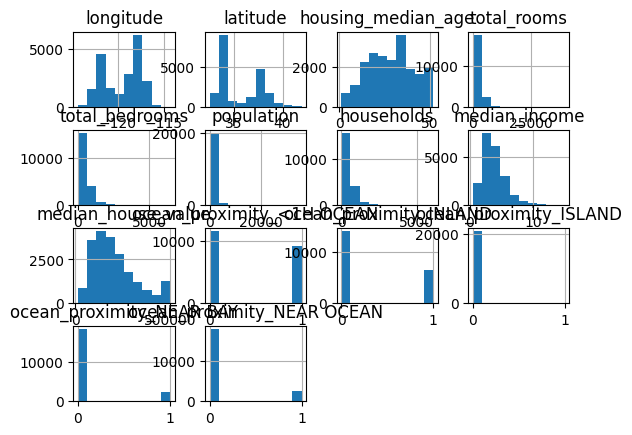

In [ ]:
data.hist()

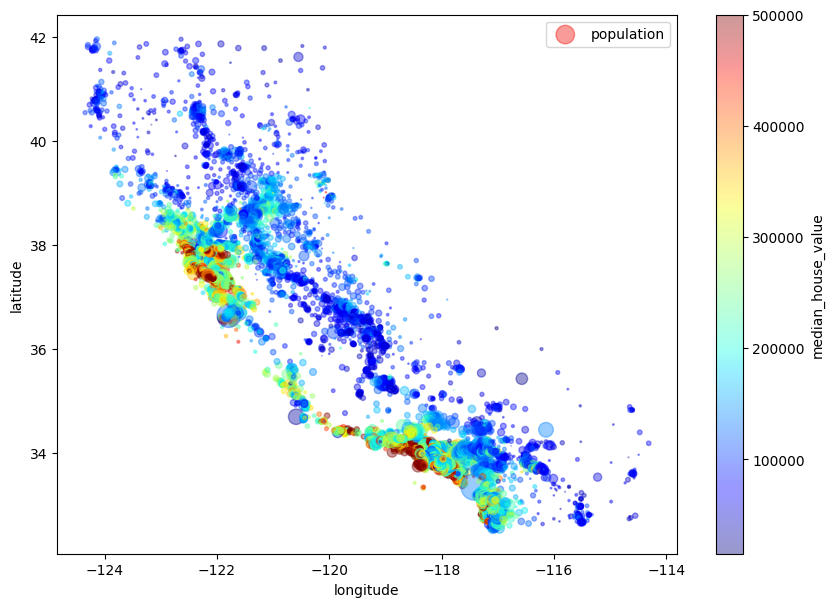

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=data["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
pipline=make_pipeline(SimpleImputer(strategy="median"))

In [ ]:
standerd=pipline.fit_transform(data.iloc[:,:])
standerd.shape

(20640, 14)

In [ ]:
data=pd.DataFrame(data=standerd,columns=col)

In [ ]:
scaller=StandardScaler()
data=scaller.fit_transform(data.iloc[:,:-5])

In [ ]:
ocean_proximity.shape

(20640, 5)

In [ ]:
data=pd.DataFrame(data=data,columns=col[:-5])
data=pd.concat([data,ocean_proximity],axis=1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,0,1,0,0,0


In [ ]:
target=data["median_house_value"]
data.drop("median_house_value",inplace=True,axis=1)

In [ ]:
data['target']=target

In [ ]:
trainx,testx,trainy,testy=train_test_split(data.iloc[:,:-1],data.iloc[:,-1])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score



```
# Cross validation scores diveds the data into folds and based on the iteration detrmine for each iteration different fold as test set
that increas the makine sure of the performane of the data
```



In [ ]:
scores=cross_val_score(tree_reg,data.iloc[:,:-1],data.iloc[:,-1],scoring="neg_mean_squared_error",cv=10)

In [ ]:
np.sqrt(-scores)

array([1.2062147 , 0.59680631, 0.8966168 , 0.66611974, 0.76634042,
       0.73011554, 0.65264143, 0.92351084, 0.90645793, 0.64760652])

- you can create train_test_split fnction that create random test data for each run 
but this very wrong cause we could be avoid it we must keep our model away from see test data that seen before 

-so..  you could compute a hash of each instance’s identifier and put that instance in the test set if the
hash is lower than or equal to 20% of the maximum hash value. This ensures that the
test set will remain consistent across multiple runs, even if you refresh the dataset.
The new test set will contain 20% of the new instances, but it will not contain any
instance that was previously in the training se

If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset and that no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:

In [ ]:
from zlib import crc32

In [ ]:
def hashed(id,test_ratio):
  return crc32(np.int64(id)) & 0xffffffff < test_ratio * 2**32

In [ ]:
def train_Test_split_min(id,test_ratio,id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_:hashed(id,test_ratio))
  return data[~ in_test_set] , data[in_test_set]

the id coloum can be indeses of the data poitn or select any satbel feature 

- the train test split technique its okay tou use the randomly techniques if your data is very big otherwise you should to use the stratifed splitiing technique 
- its can split the data and the test data will discripe the populaion and not biasd to a data  

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
att=['HouseAge','AveRooms','AveOccup','Population']

array([[<Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>],
       [<Axes: xlabel='HouseAge', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>,
        <Axes: xlabel='AveOccup', ylabel='AveRooms'>,
        <Axes: xlabel='Population', ylabel='AveRooms'>],
       [<Axes: xlabel='HouseAge', ylabel='AveOccup'>,
        <Axes: xlabel='AveRooms', ylabel='AveOccup'>,
        <Axes: xlabel='AveOccup', ylabel='AveOccup'>,
        <Axes: xlabel='Population', ylabel='AveOccup'>],
       [<Axes: xlabel='HouseAge', ylabel='Population'>,
        <Axes: xlabel='AveRooms', ylabel='Population'>,
        <Axes: xlabel='AveOccup', ylabel='Population'>,
        <Axes: xlabel='Population', ylabel='Population'>]], dtype=object)

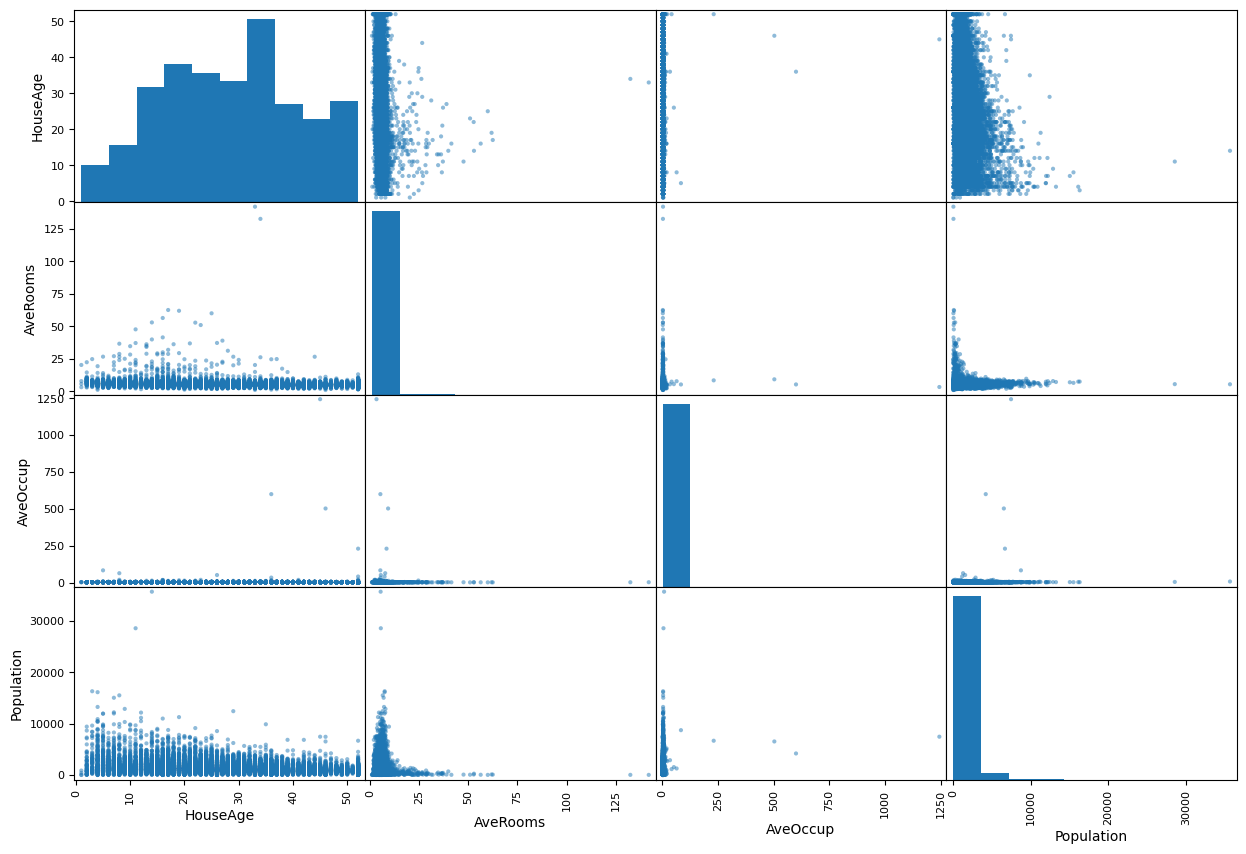

In [ ]:
scatter_matrix(data[att],figsize=(15,10))

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
data=fetch_openml("mnist_784",version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X=data['data']
y=data['target']

In [ ]:
y.shape

(70000,)

In [ ]:
dig=X.iloc[0,:]

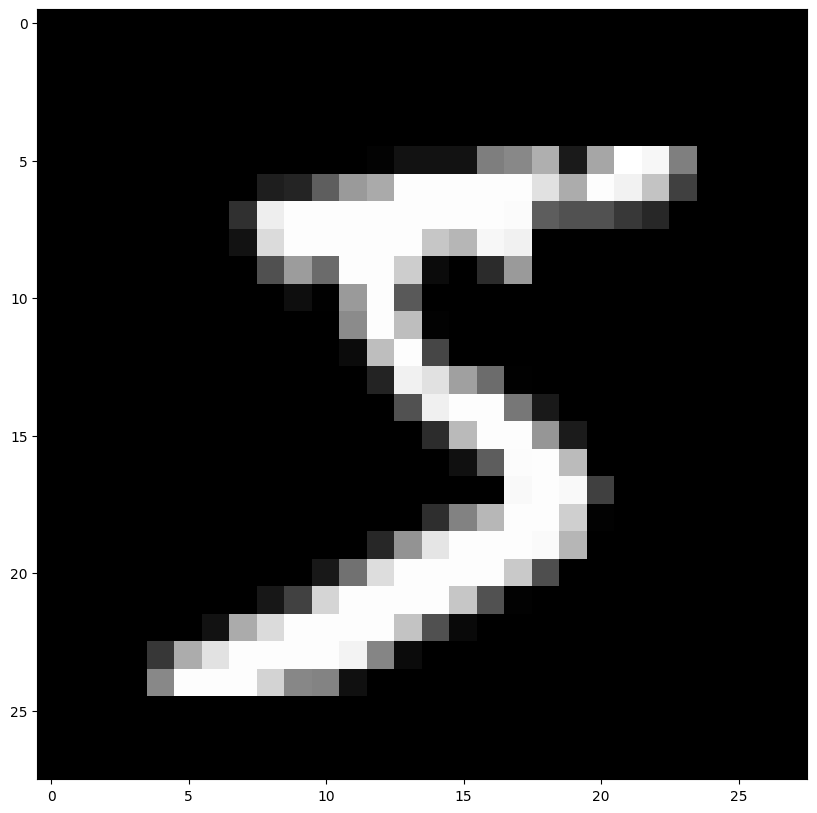

In [ ]:
dig_img=np.array(dig).reshape(28,28)
plt.figure(figsize=(10,10))
plt.imshow(dig_img,cmap='gray')

In [ ]:
y=y.astype(np.uint8)

In [ ]:
y[0]

5

In [ ]:
from sklearn.model_selection import train_test_split
traix,tetstx,trainy,testy=train_test_split(X,y)


In [ ]:
trainy.shape

(52500,)

In [ ]:
_5trainy=(trainy==5)  # True for all 5s, False for all other digits.

<Axes: xlabel='class', ylabel='Count'>

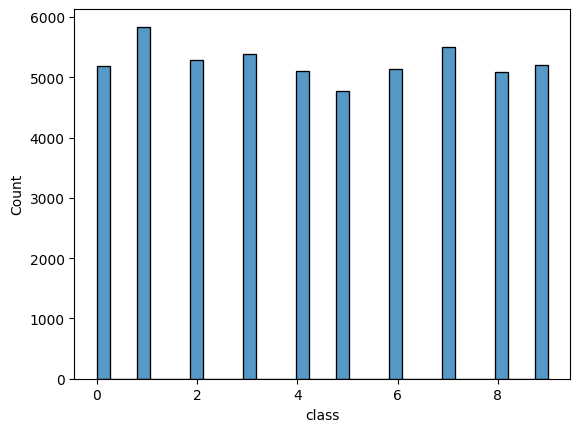

In [ ]:
sns.histplot(trainy)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='class', ylabel='Count'>

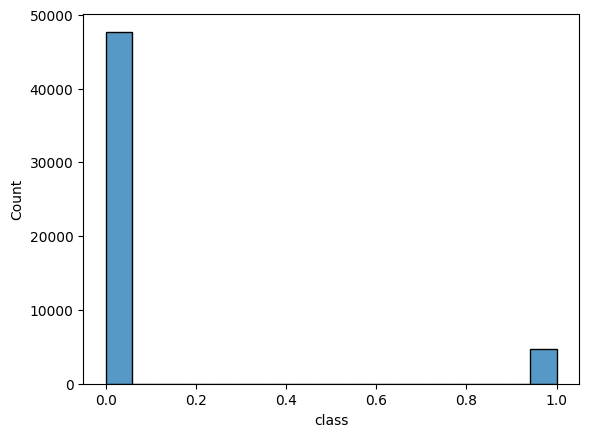

In [ ]:
sns.histplot(_5trainy)

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(traix,_5trainy)

SGDClassifier()

In [ ]:
ypred=model.predict(tetstx)

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict

In [ ]:
ypredscore=cross_val_score(model,traix,_5trainy,cv=3)
ypred=cross_val_predict(model,traix,_5trainy,cv=3)

In [ ]:
confusion_matrix(ypred,_5trainy) #Each row in a confusion matrix represents an actual class

array([[46901,  1008],
       [  829,  3762]])

In [ ]:
precision_score(ypred,_5trainy)

0.7886792452830189

In [ ]:
recall_score(ypred,_5trainy)

0.8194293182313221

In [ ]:
scores=model.decision_function(traix) #The SGDClassifier uses a threshold equal to 0



```
# raising the threshold decrese recal and increase the percestion
```





```
# Now how do you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores
```



In [ ]:
scores=cross_val_predict(model,traix,_5trainy,cv=3,method="decision_function")

In [ ]:
percesions,recalls,thresholds=precision_recall_curve(_5trainy,scores)

In [ ]:
thresholds.shape

(52500,)

In [ ]:
percesions.shape

(52501,)

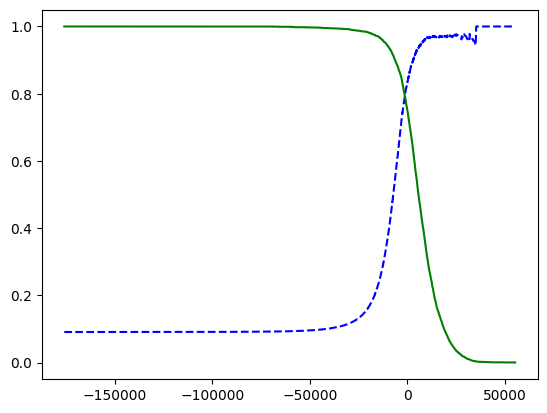

In [ ]:
plt.plot(thresholds,percesions[:-1],"b--",label="per")
plt.plot(thresholds,recalls[:-1], "g-",label="recal")
plt.show()


You may wonder why the precision curve is bumpier than the recall
curve in Figure 3-4. The reason is that precision may sometimes go
down when you raise the threshold
(although in general it will go up).

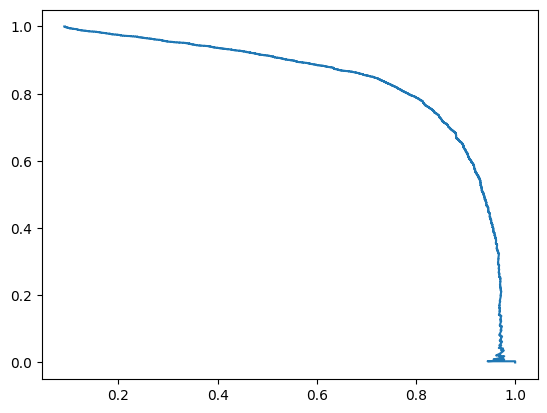

In [ ]:
plt.plot(percesions,recalls)

In [ ]:
threshold_90percesion=thresholds[np.argmax(percesions>=.80)]

In [ ]:
threshold_90percesion

-1157.423455702737

In [ ]:
ypred_with_perctions= (scores >= threshold_90percesion)

In [ ]:
ypred_with_perctions.shape

(52500,)

In [ ]:
pd.unique(ypred_with_perctions)

array([False,  True])

In [ ]:
scores.shape

(52500,)

In [ ]:
precision_score(ypred_with_perctions,_5trainy)

0.7888888888888889

In [ ]:
recall_score(ypred_with_perctions,_5trainy)

0.8001275781416117




**Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner)**.



In [42]:
data=pd.read_csv("//content//creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

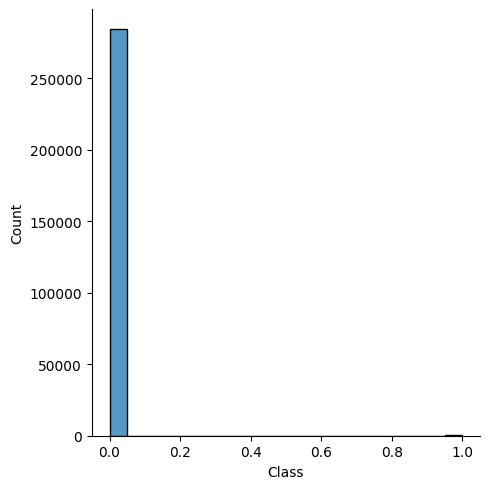

In [45]:
sns.displot(data['Class'])

In [46]:
pd.unique(data['Class'])

array([0, 1])

In [47]:
corr=data.corr()

<Axes: >

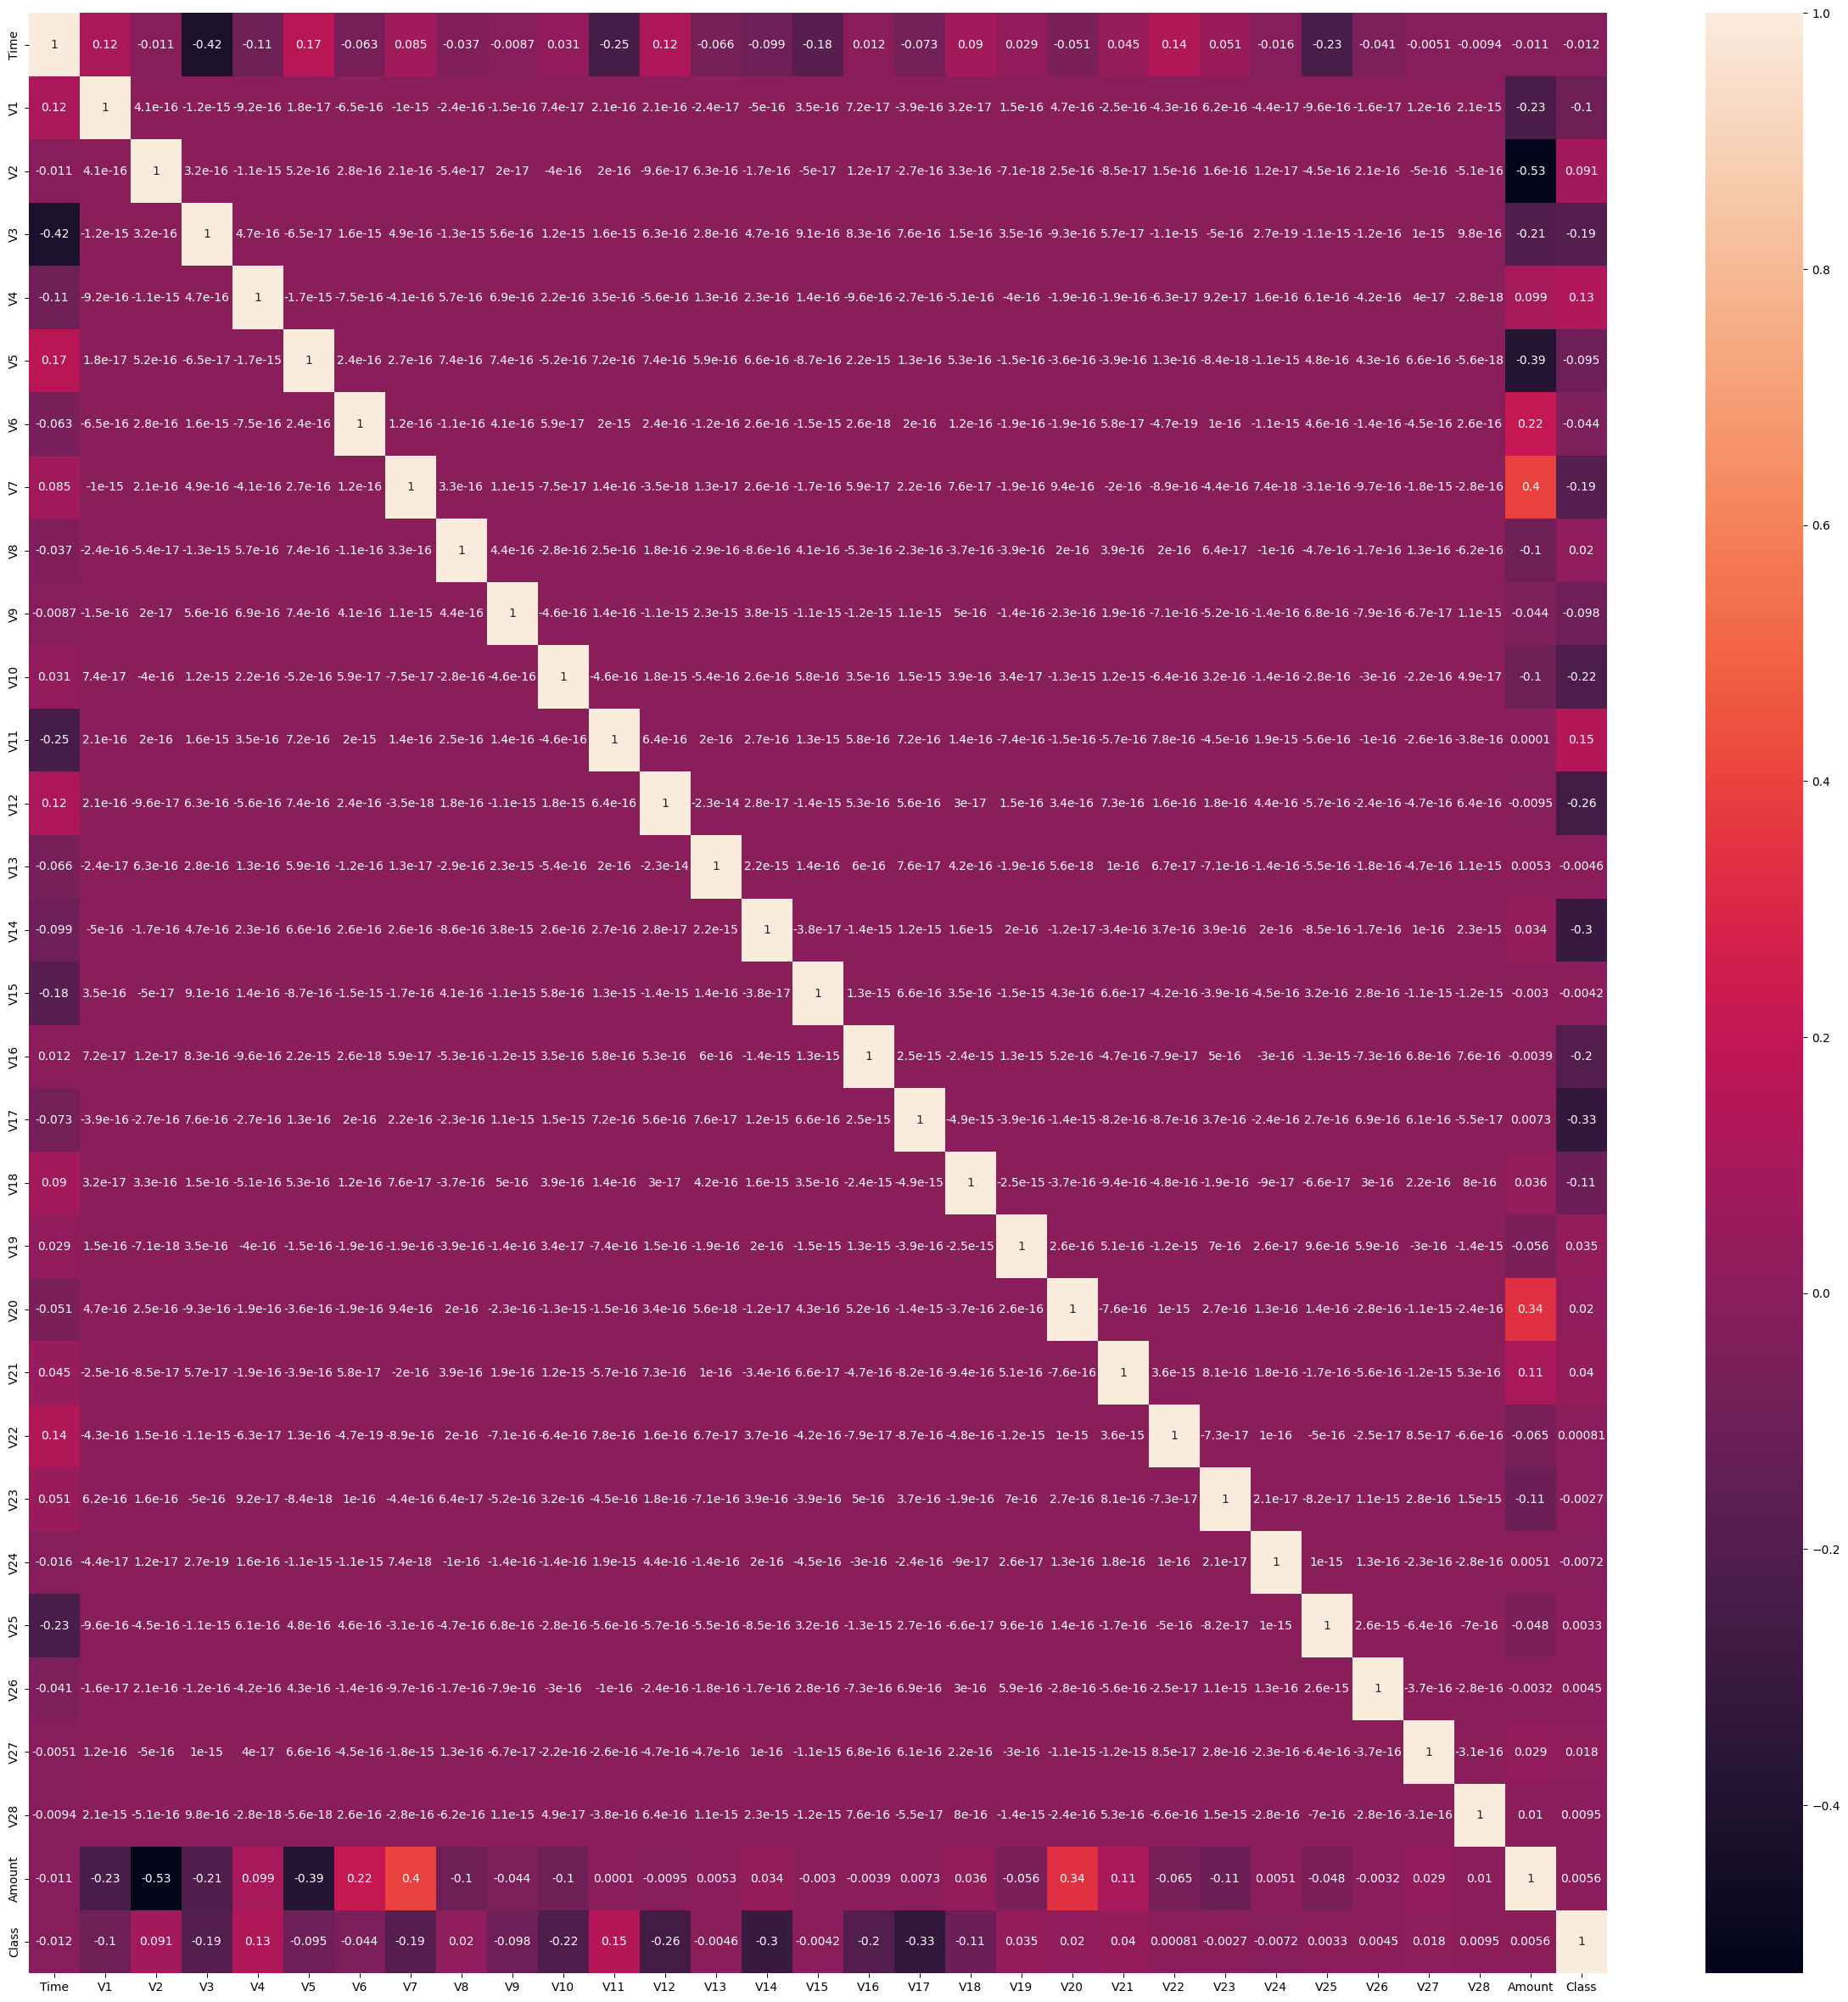

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(data=corr,annot=True)

<Figure size 3000x3000 with 0 Axes>

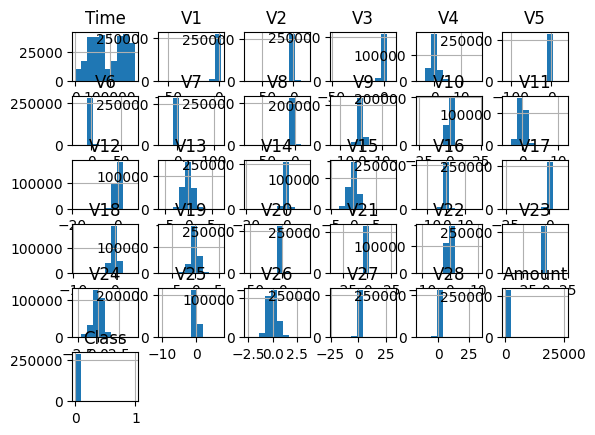

In [49]:
plt.figure(figsize=(30,30))
data.hist()
plt.show()

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['V1','V2','V3','V4','V5','Class']],figsize=(15,10))
plt.show()

KeyboardInterrupt: ignored

In [51]:
scaller=StandardScaler()

In [52]:
data['Amount']=scaller.fit_transform(np.array(data['Amount']).reshape(-1,1))

In [53]:
data.iloc[:,-1].shape

(284807,)

In [54]:
data.isna().sum()
data.dropna(inplace=True)

In [55]:
STARTA=StratifiedKFold(n_splits=3)
for trainidx,testidx in STARTA.split(data.iloc[:,:-1],data.iloc[:,-1]):
  trainx=data.iloc[trainidx,:-1]
  testx=data.iloc[testidx,:-1]
  trainy=data.iloc[trainidx,-1]
  testy=data.iloc[testidx,-1]

In [56]:
trainy.shape

(189872,)

In [58]:
trainy[trainy==1].shape

(328,)

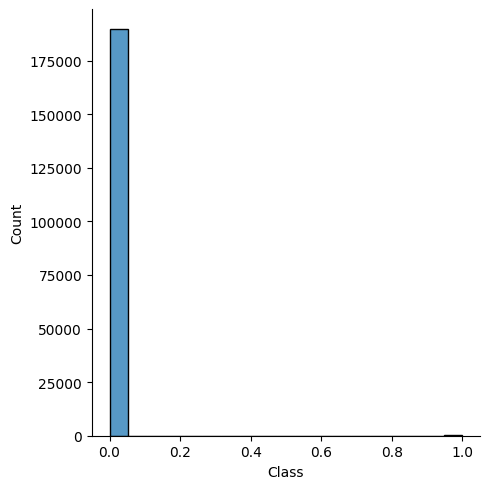

In [59]:
sns.displot(trainy)

In [70]:
from sklearn.utils.class_weight import compute_class_weight
weights_class=compute_class_weight(class_weight="balanced",classes=np.unique(trainy),y=trainy)
class_weights = dict(zip(np.unique(trainy), weights_class))

In [71]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(class_weight=class_weights)

In [84]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [66]:
trainy.shape


(189872,)

In [75]:
scores=cross_val_score(model,trainx,trainy,cv=5)


In [85]:
ypred=cross_val_predict(model,trainx,trainy,cv=5)

In [76]:
scores

array([0.94564845, 0.00173799, 0.99886765, 0.9982883 , 0.99826197])

In [77]:
weights_class

array([  0.50086523, 289.43902439])

In [78]:
class_weights

{0: 0.5008652344574347, 1: 289.4390243902439}

In [86]:
confusion_matrix(ypred,trainy)

array([[151446,    173],
       [ 38098,    155]])

#the next goal is 


1.   cheack the percesion 
2.   cheack the recall
3.   get the scores based on decesion functin on cross_val_score
4.   get the thresholds from PR curver by passing the scores and actuall Ys
5.   plot the relation between each of them with the thresholds 
6.   plot the relation between percesion and recall (pr graph)
7.   detrmine the threshold based no the suitabl percesion and recall by threshold[np.argmax(percesion>=val]
* Hint : when you increse the threshold the percesion increse else and the recall go down  


